# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation Project: Predicting Boston Housing Prices

## Getting Started
In this project, the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts, will be evaluated. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [11]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, the dataset needs to be separated into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give the quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable to predict. These are stored in `features` and `prices`, respectively.

In [13]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price: ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation
- `'RM'`: An increase in the number of rooms would lead to an increase in the value of `'MEDV'`, for more rooms usually means larger size. Larger houses usually take up more land, require more raw materials to build and maintain, thus should have higher total value. 
- `'LSTAT'`: A higher value in the percent of lower class workers would lead to a lower value in the value of `'MEDV'`. This is because people of "lower class" are ususally poor, and would not spend a lot of money on expensive stuff that improves their living conditions. Therefore, the "living quality" in the surrounding environment may not be very attractive to "upper class" people who are more likely to accept higher price when purchasing a house. Another reason is that due to some stereotype, people tend to relate "lower class" societies to higher crime rates, so they would probably not consider a neighborhood with more lower class workers as a good choice.
- `'PTRATIO'`: A higher value in ratio of students to teachers would lead to a lower value in the value of `'MEDV'`. This is similar to the situation for the lower clcass workers: students usually have lower income (or have no income) so they cannot afford luxurious living conditions. Therefore the surrounding neighbourbood may not be attractive to people who want to pay a high price for housing.

----

## Developing a Model

### Define a Performance Metric
Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.

In [4]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'    
    score = r2_score(y_true, y_predict) 
    
    # Return the score
    return score

### Shuffle and Split Data
Split the data into training and testing subsets. 

In [8]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X, y = features, prices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


----

## Analyzing Model Performance
Take a look at several models' learning and testing performances on various subsets of training data. Investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
Each graph below visualizes the learning curves of the model for both training and testing as the size of the training set is increased. The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

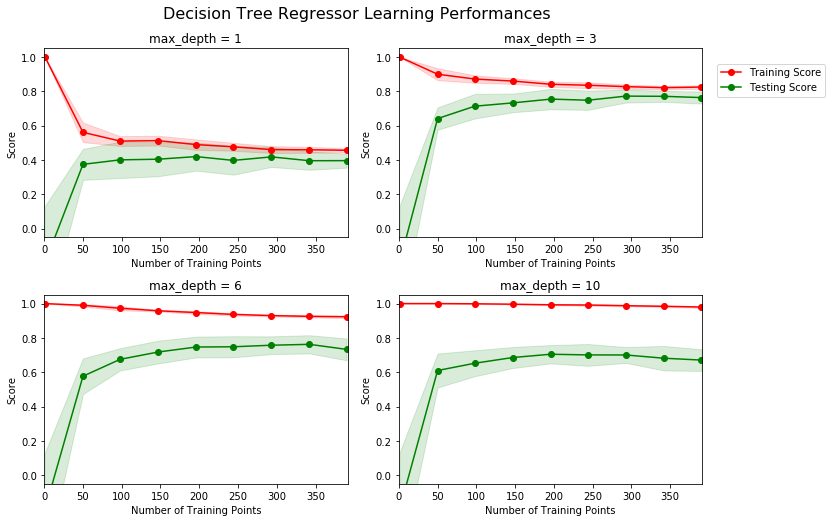

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Based on the graphs, I select the graph with the maximum_depth = 3. As more training points are added, the score of the training curve went down a little bit from 1.0 and then reached about 0.8 and became stable there. On the other hand, as more training points are added, the testing curve went up from 0 and then stablized around 0.8.      

At the beginning, the first 50 data points largely changed both the training and testing curve. Then from 50 to 300 training points, both curves are still converging, but the rate is smaller compared to the first 50 data points. When the amount of data points reached 300, the training and testing curves already converged together, so adding more data would not change much on the curves. So I think when we have fewer data (i.e., < 300), the more data we have the better for the model. But once the amount of data reaches 300, it is not necessary to add more data. In fact, if collecting data is expensive in this case, more than 300 data points will be even more unnecessary.   

### Complexity Curves
The following graph is for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

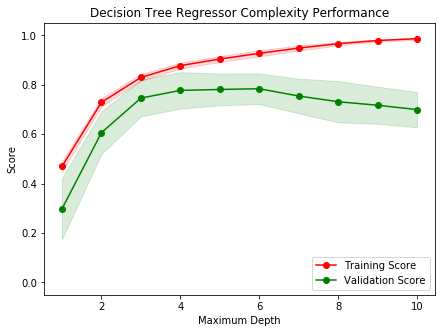

In [15]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, the model suffers from high bias, for both the training score and the validation score are low (training score: about 0.45; validation score: about 0.3). Here the scores are R^2 scores, which means that with a maximum depth of 1, the model can only predict 45% of the variation of the price for training data, and can only predict 30% of the variation of the price for validation data.
However, when the model is trained with a maximum depth of 10, we can see that the training and testing curves don't converge. To be specific, the training score was always as high as 1.0, whereas the testing score reached 0.7 and then stayed there. This pattern shows that the model suffers from high variance, for some changes in the data (from training data to testing data) lead to significant change in the model's score (drops from 1.0 to 0.7) and adding more training data cannot improve the model. This means that the model is overfitting, and cannot generalize well on testing data.

### Best-Guess Optimal Model
I think a maximum depth of 3 or 4 would result in a model that best generalizes to unseen data. Among the four graphs, maximum depth of 3 is the best, for it gives a relatively high score for both training and testing data (the two curves converge at about 0.8). When maximum depth was 1, the two curves converged but the score was low (at about 0.5), which means the model had high bias. When the maximum depth was 6 or 10, the two curves didn't converge and the training curve was always higher than the testing score, which means the model suffers from overfitting. Therefore among the four maximum depth, 3 is the best. I would say a maximum depth of 3 or 4 because I think model with maximum of 4 might have a higher score at which the two curves converge.

-----

## Evaluating Model Performance
Construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search
Some models have multiple hyper-parameters which are not directly learned within estimators. Different combinations of different values of these hyper-parameters will affect the model's performance. Grid search technique in fact helps us generate a set of models (which differ from each other in their hyper-parameter values, which lie on a grid). Then we can train each of the models and evaluate it using cross-validation, and select the one that performed best.

To be specific, for a SVM model, kernel and C are two of its hyper-parameters. If we are considering two types of kernels (linear and polynomial) and three values of C (0.1, 1, 10), then using grid search we can try all the combinations of the values of the two hyper-parameters, i.e., six combinations. Then with grid search technique we can try all the six combinations and pick the model which has the highest score.

### Cross-Validation
The k-fold cross-validation training is to partition the original training data set into k equal subsets (folds), then each time use one fold as validation set and use all the remaining k-1 folds as the training set. Each time the model is trained using the training set and the accuracy of the model is calculated by validating the predicted results against the validation set. The accuracy of the model then is evaluated by averaging the accuracies derived in all the k cases of cross validation.

Grid search is a good technique which helps us find the best combination of hyper-parameters for the model. However, there is a potential problem of overfitting, which means that it is possible that although the combination of the hyper-parameters is the best for the training data, it may be not that good when generalize to new data. Therefore, k-fold cross validation is especially useful to grid search, because by training the model with (k-1)/k of the data and validating the predicted results with 1/k of the data for k times, we can monitor the overfitting problem for the final model.

### Fitting a Model
Train a model using the **decision tree algorithm** with the grid search technique to optimize the `'max_depth'` parameter for the decision tree. 

In [20]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data    
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 1)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=1)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()    
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions

### Optimal Model

In [21]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Predicting Selling Prices
Use this model to predict the selling price for the three clients below:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

In [22]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $411,417.39
Predicted selling price for Client 2's home: $230,828.57
Predicted selling price for Client 3's home: $937,230.00


### Sensitivity
Run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [23]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Applicability: Discuss whether the constructed model should or should not be used in a real-world setting.
The Average annual inflation rate is 3.22% since the U.S. government began tracking it in 1913. It means that at that rate prices will double every 20 years. Therefore, since it is already 40 years since when the data was collected, I think the data probably cannot precisely predict today's price. However, the trend of how the predictors affect the price should still be meaningful, i.e., how the number of rooms, percent of lower class workers, and ratio of students to teachers affect the price should remain the same even after 40 years. So this model is still a good reference when we want to predict today's house price, but the exact price cannot be generated from it.

The features in the data are not sufficient to describe a home. There are other important factors that can significantly affect the price of a house, for example, the age of the house, the location of the house, quality of appliances in the home, square feet of the plot area, and presence of pool or not, etc, should also affect the price. Therefore, the current model might not be robust enough to make consistent predictions, for we don't know whether there are any interactions between the current three factors and other potential factors. Among these factors, some are about the house itself (like the quality of appliances and whether the house is old or new), and others are about the neighbourhood (like the location of the house), so simply knowing the house itself or only evaluating the neighbourhood quality cannot make a food prediction. In addition, if demand for houses increases faster than supply, then house price goes up. So the price is determined by multiple factors from various aspects, and the current model is not good enough.